# Naive Bayes (Optional)
In this TP you are going to build the Naive Bayes classifier using both continious data (assuming that they folllow normal distribution) and categorical data. In a future TP (it will be obligatory) you will use the Naive Bayes classifier that you build in this TP for continuous data without assuming that they follow the normal distribution.

You are going to fill a few missing functions in the python scripts
to implement the exercises that we ask.  So first of all read and understand the given python scripts.  To run your code you have to run the
 main\_NB.ipynb notebook.  

## Exersises

- **Fill the missing functions in NaiveBayes() class in naive\_bayes.py** to implement the the NB algorithm for continuous data and categorical data. It should work not only for continuous or categorical dataset but also for datasets with both continuous and categorical features.

Use main\_NB.ipynb in order to run the functions that you implement in NaiveBayes() class. You cannot modify the given functions.
- Write a function named compute_accuracy(y_true, y_pred) in the utils.py script. The function takes as arguments the tru and the predicted class labels and returns the accuracy. Use only numpy



- Once your implementation is ready perform Naive Bayes classification and compute the classification accuracy for the following datasets:

**Continuous datasets:**
- Iris dataset (https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)
- Breast cancer dataset (https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset)

- For the iris dataset **draw the decision surfaces** (code is given).  For the visualization purposes we chose two attributes as predictive attributes and color the plane defined by these two attributes on the basis of class labels that Naive Bayes predicts.  Draw the decision surfaces for **3 different combinations of attributes (1st-2nd),  (1st-3rd) and (1st-3rd)**.  Comment/ discuss the result.

**Categorical dataset:**

- handwritten digits dataset (https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset)



**datasert with both continuous and categorical features: **

-  Forest covertypes dataset (https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes)



	



## General instruction

The code should be well written with detailed comments to explain what you do at each step.  Avoid the for loops and if statements using the nymPy library. Your code should be generic and you should use the given functions. For example the code for the \textit{ iris data} should be applicable, to  the \textit{Digits data} without any modification.

In [2]:
from __future__ import print_function
import random
import numpy as np
import csv
from sklearn import datasets
from sklearn.utils import shuffle

from utils import plot_decision_boundary, train_test_split, compute_accuracy


import matplotlib.pyplot as plt
# make figures appear inline
%matplotlib inline


# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


## Continious data, assuming normal distribution

In [3]:
# Loas the iris data set
from utils import load_IRIS
X_train, y_train, X_test, y_test = load_IRIS(test=True)

# print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (100, 4)
Training labels shape:  (100,)
Test data shape:  (50, 4)
Test labels shape:  (50,)


## Import the NaiveBayes classifier and start filling the missing parts in order to train your classifier using continuous data (assuming that they follow Normal distribution)


In [4]:
#import naive_bayes
from naive_bayes import NaiveBayes

C:\Users\Andi\Documents\Stats\ML\TP02_NB\tp_NB\naive_bayes.py:67: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.continuous_features is 'all':


In [5]:
nb_clf = NaiveBayes(continuous_features='all')


### Fill the <font color='blue'>_calculate_prior()</font> function in naive_bays.py script

In [6]:
nb_clf._calculate_prior(y_train)
# array([0.34, 0.35, 0.31])

array([0.34, 0.35, 0.31])

## Fill the <font color='blue'>_calculate_gaussian()</font> function
**use numpy**

In [8]:
nb_clf._calculate_gaussian(x = 0.5, mean = 0, var = 1)
# 0.3520647254385327


0.3520647254385327

## Fill the <font color='blue'>train()</font> function

In [9]:
classes = np.unique(y_train)

nb_clf.train(X_train, y_train)

categorical_features = nb_clf.categorical_features
print(categorical_features)
# []

continuous_features = nb_clf.continuous_features
print(continuous_features)
# [0 1 2 3]


priors = nb_clf.priors
print(priors.shape)
# (3,)



print(priors)
# [0.34 0.35 0.31]

cond_mean = nb_clf.mean
print(cond_mean)
# [[5.04705882 3.47058824 1.47352941 0.25294118]
# [5.94       2.80857143 4.3        1.35142857]
# [6.67419355 3.         5.59354839 2.0483871 ]]

print(cond_mean.shape)
# (3, 4)

print(type(cond_mean))
# <class 'numpy.ndarray'>


print(nb_clf.var)
# [[0.11131488 0.15737024 0.03194637 0.01013841]
# [0.22411429 0.0813551  0.24914286 0.04306939]
# [0.36514048 0.11032258 0.30640999 0.07798127]]

print(nb_clf.var.shape)
# (3, 4)

print(nb_clf._calculate_gaussian(nb_clf.mean, nb_clf.var, X_train[0]).shape)
# (3, 4)

print(nb_clf._calculate_gaussian(nb_clf.mean, nb_clf.var, X_train[:, np.newaxis]).shape)
# (100, 3, 4)

print(nb_clf._calculate_gaussian(nb_clf.mean[classes[0]],nb_clf.var[classes[0]], X_train[1]).shape)
# (4,)

print(nb_clf._calculate_gaussian(nb_clf.mean[classes[0]],nb_clf.var[classes[0]], X_train).shape)
#(100, 4)


[]
[0 1 2 3]
(3,)
[0.34 0.35 0.31]
[[5.04705882 3.47058824 1.47352941 0.25294118]
 [5.94       2.80857143 4.3        1.35142857]
 [6.67419355 3.         5.59354839 2.0483871 ]]
(3, 4)
<class 'numpy.ndarray'>
[[0.11131488 0.15737024 0.03194637 0.01013841]
 [0.22411429 0.0813551  0.24914286 0.04306939]
 [0.36514048 0.11032258 0.30640999 0.07798127]]
(3, 4)
(3, 4)
(100, 3, 4)
(4,)
(100, 4)


## Fill the <font color='blue'>_calculate_posteriors()</font> function when continuous_features.size != 0

In [10]:
posteriors = nb_clf._calculate_posteriors(X_train[0:10])
print(posteriors.shape)

# (10, 3)


(10, 3)


## Fill the <font color='blue'>predict()</font> function 

In [11]:
nb_clf.predict(X_train[0:10])
test_acc = compute_accuracy(y_test, nb_clf.predict(X_test))
print(test_acc)

0.96


## Categorical data

In [12]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issues)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

Clear previously loaded data.


In [13]:
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer

## Import the NaiveBayes classifier for catagorical data and start filling the missing parts in order to train your classifier using discrete data 


In [14]:
# toy data
X_train =  [[0, 0],
         [1, 1],
         [1, 0],
         [0, 1],
         [1, 1],
         [2, 1],
         [0, 2],
         [2, 2],
         [1, 1],
         [0, 2]]
y_train = [0, 0, 1, 0, 0, 0, 1, 1, 0, 0]
X_train, y_train = np.array(X_train), np.array(y_train)

# P(y=0) = 7/10 et P(y=1) = 3/10 (la somme des deux = 1)
# P(x1=0 | y=0).....P(x2=0 | y = 0)......
# exemple : P(x1=0 | y=0) le nombre de fois ou la valeur x1 vaut 0 et que celle de y vaut aussi 0 pour la même ligne :
# résultat = 3/7...il est ensuite possible de remplir tout un tableau de toutes les probas (cf photo)

#P(Y=0 | x1=0, x2=0) = P(y=0) * P(x1=0|y=0)* P(x2=0|y=0) = 7/10 * 3/7 * 1/7 = 3/70 (proba le plus elevé)
#P(y=1 | x1=0, x2=0) = P(y=1) * P(x1=0|y=0)* P(x2=0|y=0) = 3/10 * 1/3 * 1/3 = 1/30


In [15]:
clf_nbcat = NaiveBayes(continuous_features = None)

clf_nbcat._calculate_prior(y_train)

# array([0.7, 0.3])

array([0.7, 0.3])

## Fill the <font color='blue'>_calculate_frequencies()</font>  and the rest of the <font color='blue'>train()</font> functions


In [16]:
clf_nbcat.train(X_train, y_train)

In [17]:
categorical_features = clf_nbcat.categorical_features
print(categorical_features)
# [0 1]

num_categories_each_feature = clf_nbcat.num_categories_each_feature

print(num_categories_each_feature)
# [3 3]

print(type(num_categories_each_feature))
# numpy.ndarray

continuous_features = clf_nbcat.continuous_features
print(continuous_features)
# []


priors = clf_nbcat.priors
print(priors.shape)
# (2,)

frequencies = clf_nbcat.frequencies

print(len(frequencies))
# 2

print(frequencies[0].shape)
# (2, 3)



[0 1]
[3 3]
<class 'numpy.ndarray'>
[]
(2,)
2
(2, 3)


In [18]:
type(clf_nbcat.num_categories_each_feature)

numpy.ndarray

## ToDo: **As a sanity check for an attribute verify that** $\sum_j (x_i = v_{ij} \vert y = y_k) = 1$ 




Pour performer cette vérification, il suffir de choisir un attribut (par exemple : la première colonne) ainsi que toutes les valeurs possibles dans cette colonne afin de vérifier pour chaque classe (0 et 1) si la somme des occurences pour les valeurs séléctionnées en exemple sont égales à 1

Pour mettre en place cette vérification, je met à disposition une fonction (calcul_probas) permettant de calculer les probabilités pour chaque valeur de la première colonne (index 0), sachant les deux possibles classes (0 et 1).

Afin de vérifier si le total pour chaque classe correspond à 0, j'utilise une deuxième fonction (sanity_check) permettant de recevoir toutes les probabilités d'une classe et de calculer la somme (arrondie pour éviter les erreurs). Cette fonction retournera vrai si la somme vaut bien 1.


In [20]:
def sanity_check(attribute_probs, yk):
    sum_prob = 0
    for vij, p in attribute_probs.items():
        if p < 0 or p > 1:
            return False
        sum_prob += p
    return round(sum_prob, 5) == 1  # Utilisation de round() pour éviter les erreurs d'approximations


def calcul_probas(X_train, y_train, feature_index):
    classes = np.unique(y_train)
    values = np.unique(X_train[:, feature_index])
    probabilities = {}

    for y in classes:
        y_indices = y_train == y
        count_y = np.sum(y_indices)
        count_x_given_y = {x: np.sum(X_train[y_indices, feature_index] == x) for x in values}
        probabilities[y] = {x: count_x_given_y[x] / count_y for x in values}

    return probabilities

# Calcul des probabilités pour la première colonne (index = 0) et dont la valeur
feature_index = 0
probabilites = calcul_probas(X_train, y_train, feature_index)

# Sanity check pour chacunes des classes possibles (dans notre exemple: 0 et 1)
for classY, probs in probabilites.items():
    sanity_check_result = sanity_check(probs, classY)
    print(f"\nProbabilitées pour la classe {classY}: {probs}")
    print(f"Probabilitées pour la classe {classY}: {sanity_check_result}")


Probabilitées pour la classe 0: {0: 0.42857142857142855, 1: 0.42857142857142855, 2: 0.14285714285714285}
Probabilitées pour la classe 0: True

Probabilitées pour la classe 1: {0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}
Probabilitées pour la classe 1: True


## Fill the <font color='blue'>_calculate_posteriors()</font> function when continuous_features.size != 0



In [21]:
posteriors = clf_nbcat._calculate_posteriors(X_train)
print(posteriors.shape)
# (10, 2)


(10, 2)


In [22]:
clf_nbcat.predict(X_train)
print(clf_nbcat.predict(X_train).shape)
# (10,)


(10,)


## Verify your implementation using continuous and categorical data

In [23]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issues)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

In [24]:

X = [[0, 0, 180.1, 75],
     [1, 1, 165, 61],
     [1, 0, 167, 62],
     [1, 1, 174, 69],
     [0, 0, 184, 82],
     [0, 1, 178, 63],
     [1, 1, 174, 69],
     [2, 1, 166, 60],
     [2, 2, 155, 56],
     [0, 2, 167, 59],
     [2, 2, 165, 60],
     [1, 1, 173, 68],
     [0, 2, 167, 59],
     [0, 2, 174, 73]]
y = [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]
X_train = np.array(X)
y_train = np.array(y)

nb_clf_ = NaiveBayes(continuous_features = [2,3])
nb_clf_.train(X_train, y_train)

nb_clf_.predict(X_train)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

# Once your implementation is ready run the Naive Bayes classifier and compute the classification accuracy for the  datasets  we mentioned above.

## (You have to fill  the compute_accuracy() function in the utils.py script)




-------------------------------------------------------------------------------------------------------------------

# Naive Bayes classifier with continuous dataset assuming Normal distribution
# Run the Naive Bayes classifier using following datasets and compute the classification accuracy
- iris dataset (https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)
- Breast cancer dataset (https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset)



- For the iris dataset draw the decision surfaces for 3 different combinations of attributes (1st-2nd),  (1st-3rd) and (1st-3rd)

In [25]:
from utils import compute_accuracy

<h4>Generic function for NaiveBayes class we created</h4>
Cette fonction sera appelée pour chaque dataset utilisé

In [26]:
# Run the naive bayes classifier and compute the train and test accuracy

def run_naive_bayes(X_train, y_train, X_test, y_test, continuous_features):
    nb_clf = NaiveBayes(continuous_features=continuous_features)
    nb_clf.train(X_train, y_train)
    train_acc = compute_accuracy(y_train, nb_clf.predict(X_train))
    test_acc = compute_accuracy(y_test, nb_clf.predict(X_test))
    return train_acc, test_acc

Fonction permettant d'afficher les résultats plus "proprement"

In [27]:
def display_table(data):
        print("Dataset            | Train Accuracy  | Test Accuracy")
        print("--------------------------------------------------")
        for entry in data:
            dataset, train_acc, test_acc = entry
            print(f"{dataset:<18} | {train_acc * 100:.2f}%          | {test_acc * 100:.2f}%")

In [28]:
#Format de notre jeu de données contenant tous nos résultats
data_results = []

## Iris dataset

In [29]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issues)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

In [30]:
# Loas the iris data set
from utils import load_IRIS
X_train, y_train, X_test, y_test = load_IRIS(test=True)

# print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Training data shape:  (100, 4)
Training labels shape:  (100,)
Test data shape:  (50, 4)
Test labels shape:  (50,)


### To Do: Run the naive bayes classifier and compute the train and test accuracy

In [31]:
#IRIS


train_acc, test_acc = run_naive_bayes(X_train, y_train, X_test, y_test, 'all')
print(f"Train accuracy: {train_acc:.6f}")
print(f"Test accuracy: {test_acc:.6f}")
data_results.append(["Iris", train_acc, test_acc])


Train accuracy: 0.960000
Test accuracy: 0.960000


### To Do: Decision surfaces. Draw the decision surfaces for 3 different combinations of attributes (1st-2nd),  (1st-3rd) and (1st-3rd). 

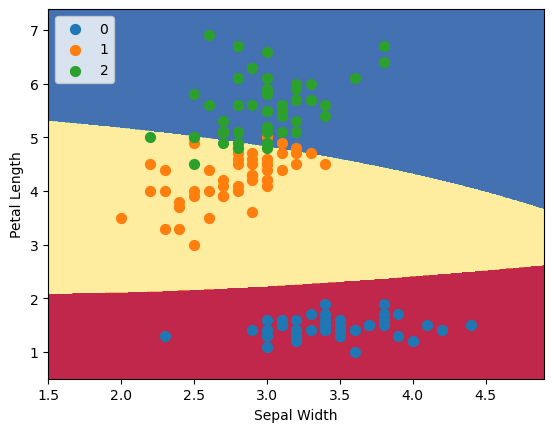

In [34]:
# For our visualisation we will  keep only two first attributs.
# You can choose 2 attribus here
X_train, y_train = load_IRIS(test=False)

attribut_1 = 1
attribut_2 = 2
axes_labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

X_train_2_features = np.array([X_train[:,attribut_1], X_train[:,attribut_2]]).T
axes_label_1 = axes_labels[attribut_1]
axes_label_2 = axes_labels[attribut_2]

# plot the decision surface
model = NaiveBayes(continuous_features = 'all')

colors_points = ['blue', 'red', 'green']

X = X_train_2_features
y = y_train
plot_decision_boundary(model, X, y, axes_label_1, axes_label_2)               

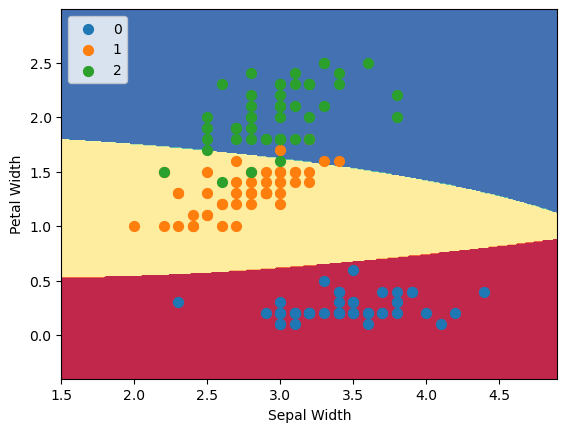

In [35]:
# For our visualisation we will only keep only two first attributs.
# You can choose 2 attribus here
X_train, y_train = load_IRIS(test=False)

attribut_1 = 1
attribut_2 = 3
axes_labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

X_train_2_features = np.array([X_train[:,attribut_1], X_train[:,attribut_2]]).T
axes_label_1 = axes_labels[attribut_1]
axes_label_2 = axes_labels[attribut_2]

# plot the decision surface
model = NaiveBayes(continuous_features = 'all')

colors_points = ['blue', 'red', 'green']

X = X_train_2_features
y = y_train
plot_decision_boundary(model, X, y, axes_label_1, axes_label_2)               

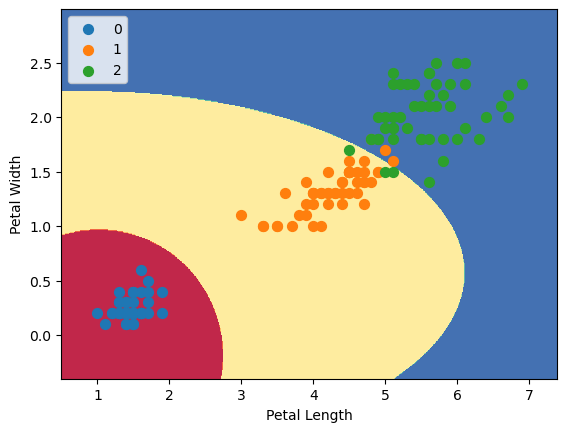

In [36]:
# For our visualisation we will only keep only two first attributs.
# You can choose 2 attribus here
X_train, y_train = load_IRIS(test=False)

attribut_1 = 2
attribut_2 = 3
axes_labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

X_train_2_features = np.array([X_train[:,attribut_1], X_train[:,attribut_2]]).T
axes_label_1 = axes_labels[attribut_1]
axes_label_2 = axes_labels[attribut_2]

# plot the decision surface
model = NaiveBayes(continuous_features = 'all')

colors_points = ['blue', 'red', 'green']

X = X_train_2_features
y = y_train
plot_decision_boundary(model, X, y, axes_label_1, axes_label_2)               

## Breast cancer dataset



In [208]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issues)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

Clear previously loaded data.


In [209]:
#load the digits dataset from sklearn

from sklearn import datasets

data = datasets.load_breast_cancer()

X, y = shuffle(data.data, data.target, random_state= 1234)


X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, normalize = True)
X_train.shape

(399, 30)

### To Do: Run the naive bayes classifier and compute the train and test accuracy


In [210]:
#IRIS


train_acc, test_acc = run_naive_bayes(X_train, y_train, X_test, y_test, 'all')
print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

data_results.append(["Breast_cancer", train_acc, test_acc])


Train accuracy: 0.917
Test accuracy: 0.941


-------------------------------------------------------------------------------------------------------------------

# Naive Bayes Classifier for categorical dataset
# Run the Naive Bayes classifier using following dataset and compute the classification accuracy 

- handwritten digits dataset (https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset)



## Digits dataset

Each datapoint is a 8x8 image of a digit.

In [211]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issues)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

Clear previously loaded data.


In [212]:
#load the digits dataset from sklearn

from sklearn import datasets

data = datasets.load_digits()

X, y = shuffle(data.data, data.target, random_state= 1234)

print(X)
print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(X.min(), X.max()))



X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.4, normalize = True)
X_train.shape

[[ 0.  0.  8. ...  0.  0.  0.]
 [ 0.  0.  0. ... 16.  6.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  6. ...  5.  0.  0.]
 [ 0.  0.  4. ...  6.  0.  0.]
 [ 0.  0.  3. ... 10.  0.  0.]]
Min Pixel Value: 0.0 
Max Pixel Value: 16.0


(1079, 64)

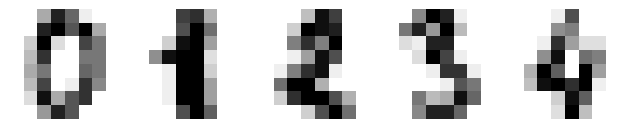

In [213]:
import matplotlib.pyplot as plt

# Visualize examples from the Digits dataset
for i in range(5):
    image = data.images[i]
    plt.subplot(1, 5, i+1);          
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.tight_layout(); 
plt.show()



### To Do: Run the naive bayes classifier and compute the train and test accuracy

In [214]:
# Run the naive bayes classifier and compute the train and test accuracy

train_acc, test_acc = run_naive_bayes(X_train, y_train, X_test, y_test, None)
print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

data_results.append(["Digits", train_acc, test_acc])


Train accuracy: 0.894
Test accuracy: 0.859


-------------------------------------------------------------------------------------------------------------------

## Naive Bayes Classifier for datset with both continuous & categorical features
## Run the Naive Bayes classifier using following dataset and compute the classification accuracy
-  Forest covertypes dataset (https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes)
    - **This dataset containts both continuous and categorical features**
    - dataset’s homepage:  https://archive.ics.uci.edu/ml/datasets/Covertype
    
Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database. 

Name / Data Type / Measurement / Description:

- Elevation / quantitative /meters / Elevation in meters 
- Aspect / quantitative / azimuth / Aspect in degrees azimuth 
- Slope / quantitative / degrees / Slope in degrees 
- Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features 
- Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features 
- Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway 
- Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice 
- Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice 
- Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice 
- Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points 
- Wilderness_Area **(4 binary columns)** / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation 
- Soil_Type **(40 binary columns)** / qualitative / 0 (absence) or 1 (presence) / Soil Type designation 
- Cover_Type (7 types) / integer / **1 to 7** / Forest Cover Type designation



In [215]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issues)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

Clear previously loaded data.


In [216]:
#load the digits dataset from sklearn

from sklearn import datasets

data = datasets.fetch_covtype()

X_, y_ = shuffle(data.data, data.target, random_state= 1234)

print(data.DESCR)
print(X_.shape)
print(np.unique(y_))


.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30Ã—30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional 

In [217]:
# Prepere the data

# Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation 
Soil_Type = np.argwhere(X_[:,-44:-40]==1)[:,1]
Soil_Type = Soil_Type[:,np.newaxis]



#Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation 
Wilderness_Area = np.argwhere(X_[:,-40:]==1)[:,1]
Wilderness_Area = Wilderness_Area[:,np.newaxis]

cont = X_[:,:10]
print(cont.shape)

X = np.hstack([cont, Soil_Type, Wilderness_Area])

# Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation
y = y_-1

(581012, 10)


In [218]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.4, normalize = True)
print(X_train.shape)
print(np.unique(y_train))

(348608, 12)
[0 1 2 3 4 5 6]


### To Do: Run the naive bayes classifier and compute the train and test accuracy

In [219]:
# Run the naive bayes classifier and compute the train and test accuracy

train_acc, test_acc = run_naive_bayes(X_train, y_train, X_test, y_test, [0,1,2,3,4,5,6,7,8,9])
print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

data_results.append(["Forest covertypes", train_acc, test_acc])

Train accuracy: 0.636
Test accuracy: 0.636


-------------------------------------------------------------------------------------------------------------------

<h3>All Results</h3>

In [226]:

display_table(data_results)

Dataset            | Train Accuracy  | Test Accuracy
--------------------------------------------------
Iris               | 96.00%          | 96.00%
Breast_cancer      | 91.73%          | 94.12%
Digits             | 89.43%          | 85.93%
Forest covertypes  | 63.55%          | 63.65%
